# Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
folder_path = '/content/drive/MyDrive/Colab Notebooks/PTIT/TTCS/time-svm/visualize-time/result'
hardmargin_svm_hashing = 'hardmargin_svm_hashing1000'
hardmargin_svm_tfidf='hardmargin_svm_tfidf'
linear_svm_tfidf_phuc='linear_svm_tfidf_phuc'
svm_pegasos = 'svm_pegasos'
base_svm_tfidf='base_svm_tfidf'

In [ ]:
a = [i for i in range(1000, 10000, 500)]
b = [i for i in range(1500, 5500, 500)]
c = [i for i in range(1000, 5500, 500)]

# Thêm cột n

In [ ]:
for i in a:
  df = pd.read_csv(os.path.join(folder_path, f'{hardmargin_svm_hashing}_{i}.csv'))
  df['n'] = i
  df['class_name'] = df['class_name'] + '_hashing'
  df.to_csv(os.path.join(folder_path, f'{hardmargin_svm_hashing}_{i}.csv'), index=False)
  df3 = pd.read_csv(os.path.join(folder_path, f'{base_svm_tfidf}_{i}.csv'))
  df3['n'] = i
  df3.to_csv(os.path.join(folder_path, f'{base_svm_tfidf}_{i}.csv'), index=False)

In [ ]:
for i in a:
  df3 = pd.read_csv(os.path.join(folder_path, f'{linear_svm_tfidf_phuc}_{i}.csv'))
  df3['n'] = i
  df3.to_csv(os.path.join(folder_path, f'{linear_svm_tfidf_phuc}_{i}.csv'), index=False)

In [ ]:
for i in c:
  df4 = pd.read_csv(os.path.join(folder_path, f'{hardmargin_svm_tfidf}_{i}.csv'))
  df4['n'] = i
  df4['class_name'] = df4['class_name'] + '_tfidf'
  df4.to_csv(os.path.join(folder_path, f'{hardmargin_svm_tfidf}_{i}.csv'), index=False)

# Gộp

In [ ]:
dataframes = []
df = pd.read_csv(os.path.join(folder_path, f'{hardmargin_svm_tfidf}_1000.csv'))
dataframes.append(df)
for i in b:
    df1 = pd.read_csv(os.path.join(folder_path, f'{hardmargin_svm_tfidf}_{i}.csv'))
    dataframes.append(df1)
for i in a:
    df1 = pd.read_csv(os.path.join(folder_path, f'{hardmargin_svm_hashing}_{i}.csv'))
    df2 = pd.read_csv(os.path.join(folder_path, f'{linear_svm_tfidf_phuc}_{i}.csv'))
    df3 = pd.read_csv(os.path.join(folder_path, f'{base_svm_tfidf}_{i}.csv'))
    df4 = pd.read_csv(os.path.join(folder_path, f'{svm_pegasos}_{i}.csv'))
    dataframes.append(df1)
    dataframes.append(df2)
    dataframes.append(df3)
    dataframes.append(df4)
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.to_csv(os.path.join(folder_path, f'combined_time_svm.csv'), index=False)

# Load data mới

In [4]:
df = pd.read_csv(os.path.join(folder_path, f'combined_time_svm.csv'))
df.head()

,class_name,time,accuracy_score,f1_score,n,prep_time
0,HardMarginSVM_tfidf,188.271099,0.945000,0.946860,1000,NaN
1,HardMarginSVM_tfidf,483.728427,0.960000,0.963415,1500,NaN
2,HardMarginSVM_tfidf,1025.564333,0.960000,0.961353,2000,NaN
3,HardMarginSVM_tfidf,1769.558942,0.976000,0.976378,2500,NaN
4,HardMarginSVM_tfidf,2834.332839,0.966667,0.966887,3000,NaN


# Visualize

## n vs time

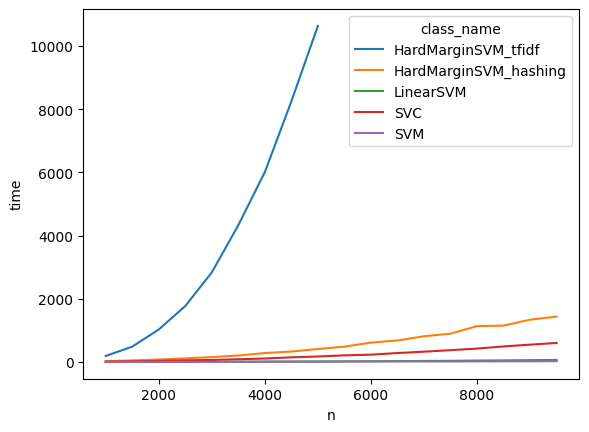

In [ ]:
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df);

<Axes: xlabel='n', ylabel='time'>

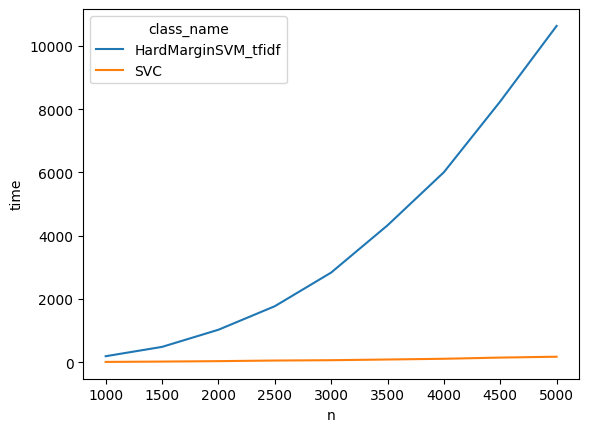

In [ ]:
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df[((df['class_name'] == 'SVC') | (df['class_name'] == 'HardMarginSVM_tfidf')) & (df['n'] <= 5000)])

<Axes: xlabel='n', ylabel='time'>

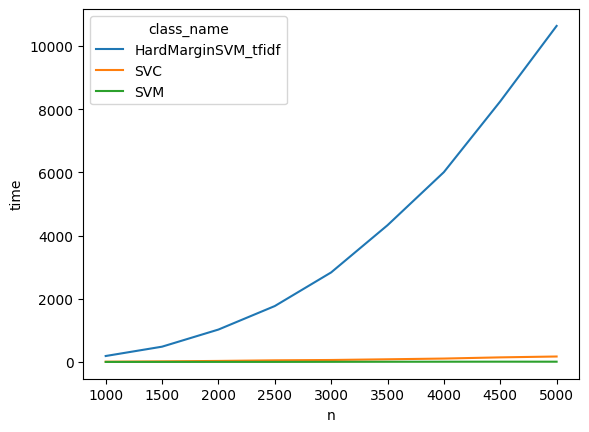

In [ ]:
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df[((df['class_name'] == 'SVC') | (df['class_name'] == 'HardMarginSVM_tfidf') | (df['class_name'] == 'SVM')) & (df['n'] <= 5000)])

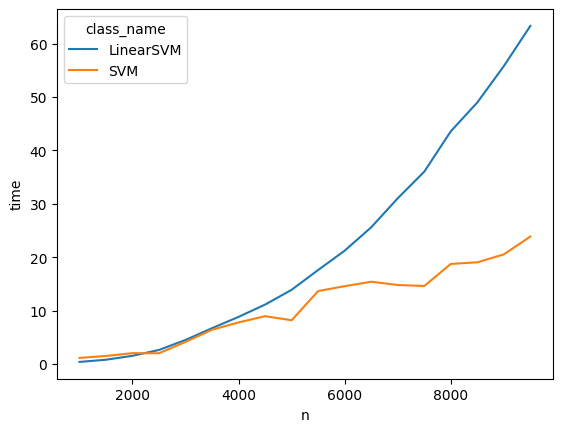

In [ ]:
# @title
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df[(df['class_name'] == 'LinearSVM') | (df['class_name'] == 'SVM')]);

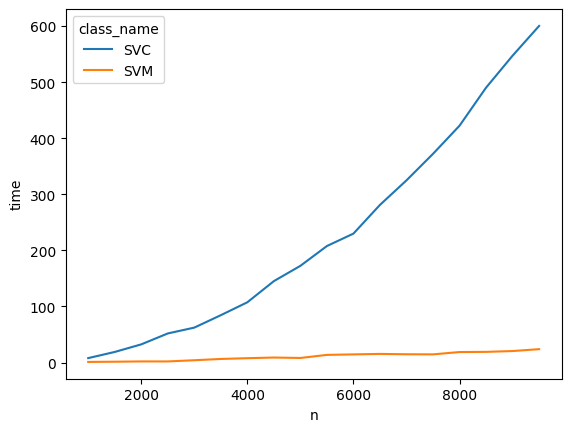

In [ ]:
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df[(df['class_name'] == 'SVM') | (df['class_name'] == 'SVC')]);

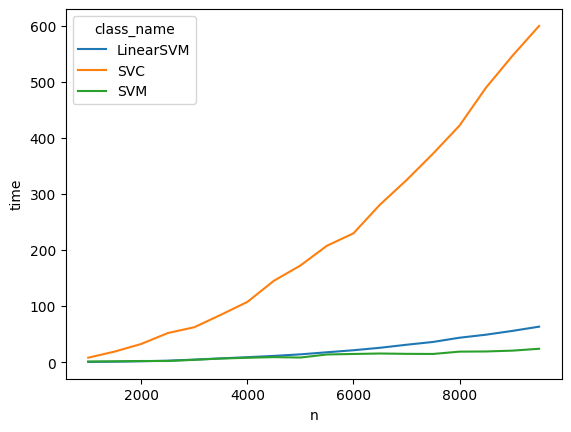

In [ ]:
# @title
sns.lineplot( x = "n", y = "time",hue = 'class_name',data = df[(df['class_name'] == 'LinearSVM') | (df['class_name'] == 'SVM') | (df['class_name'] == 'SVC')]);

## n vs accuracy

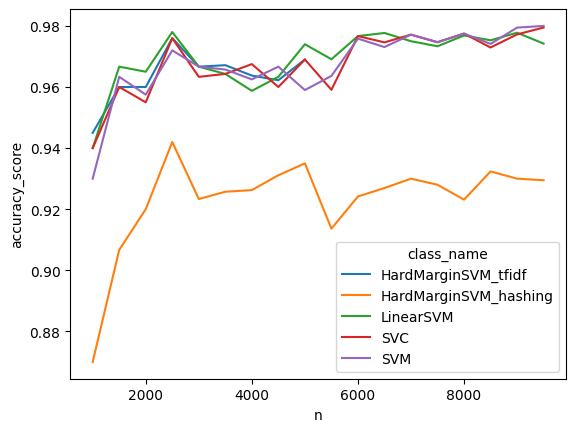

In [ ]:
sns.lineplot( x = "n", y = "accuracy_score",hue = 'class_name',data = df);

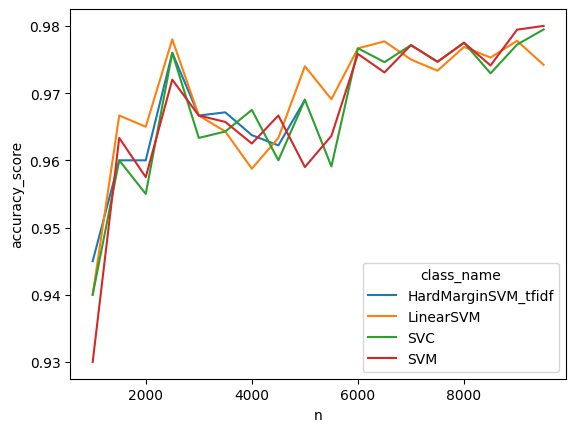

In [ ]:
sns.lineplot( x = "n", y = "accuracy_score",hue = 'class_name',data = df[df['class_name'] != 'HardMarginSVM_hashing']);

<Axes: xlabel='n', ylabel='accuracy_score'>

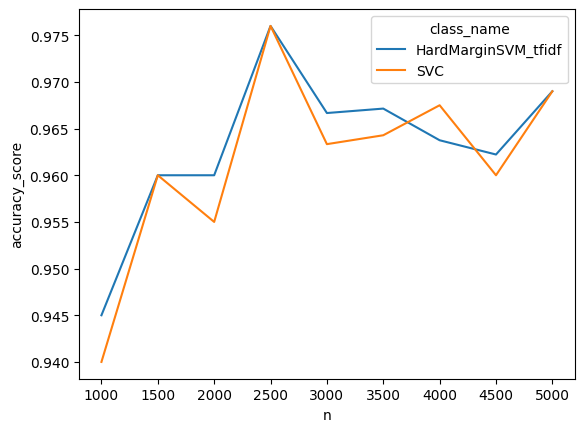

In [ ]:
sns.lineplot( x = "n", y = "accuracy_score",hue = 'class_name',data = df[(df['class_name'] == 'HardMarginSVM_tfidf') | (df['class_name'] == 'SVC') & (df['n'] <= 5000)])

<Axes: xlabel='n', ylabel='accuracy_score'>

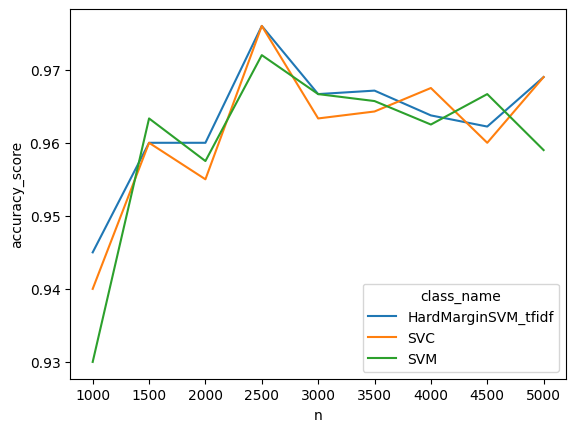

In [ ]:
sns.lineplot( x = "n", y = "accuracy_score",hue = 'class_name',data = df[((df['class_name'] == 'HardMarginSVM_tfidf') | (df['class_name'] == 'SVC')  | (df['class_name'] == 'SVM')) & (df['n'] <= 5000)])

<Axes: xlabel='n', ylabel='accuracy_score'>

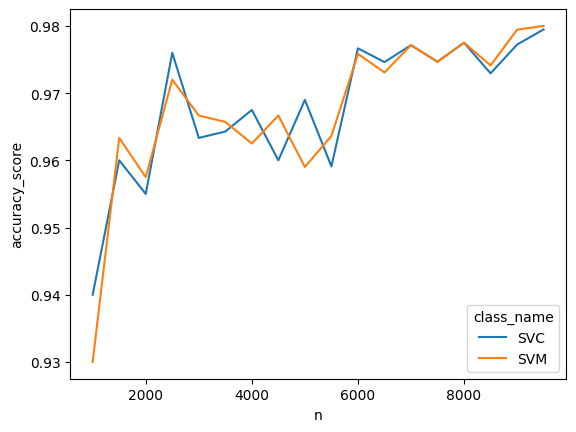

In [ ]:
sns.lineplot( x = "n", y = "accuracy_score",hue = 'class_name',data = df[((df['class_name'] == 'SVC')  | (df['class_name'] == 'SVM'))])

## n vs f1 score

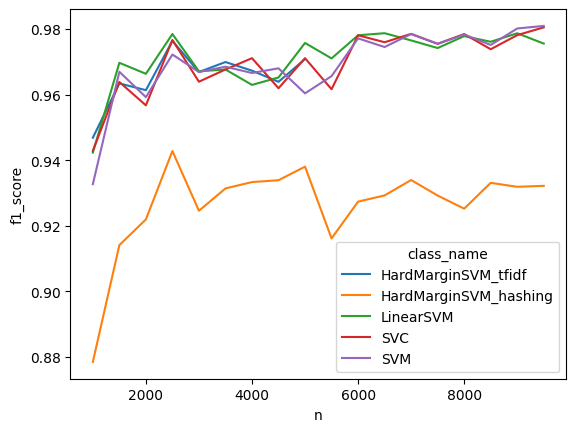

In [7]:
sns.lineplot( x = "n", y = "f1_score",hue = 'class_name',data = df);

<Axes: xlabel='n', ylabel='f1_score'>

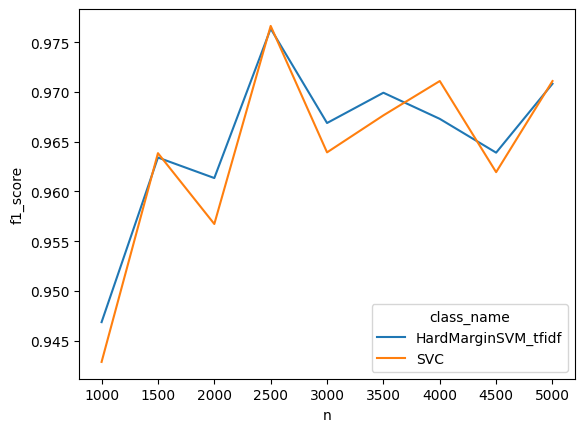

In [5]:
sns.lineplot( x = "n", y = "f1_score",hue = 'class_name',data = df[(df['class_name'] == 'HardMarginSVM_tfidf') | (df['class_name'] == 'SVC') & (df['n'] <= 5000)])

<Axes: xlabel='n', ylabel='f1_score'>

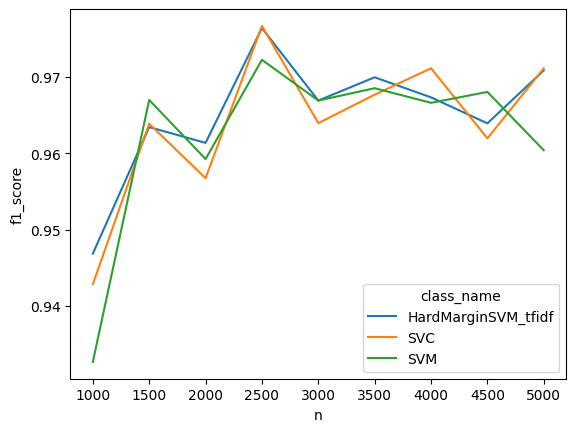

In [9]:
sns.lineplot( x = "n", y = "f1_score",hue = 'class_name',data = df[((df['class_name'] == 'HardMarginSVM_tfidf') | (df['class_name'] == 'SVM') | (df['class_name'] == 'SVC')) & (df['n'] <= 5000)])

<Axes: xlabel='n', ylabel='f1_score'>

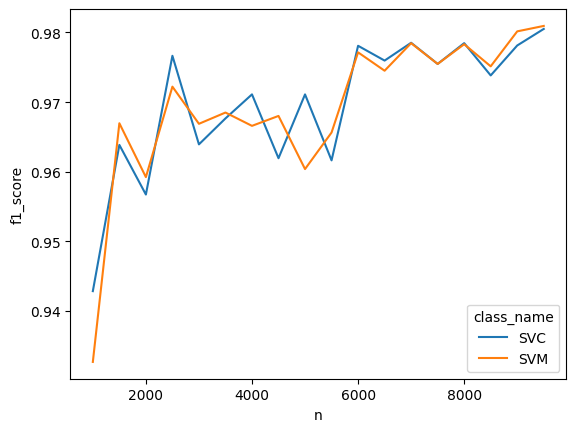

In [6]:
sns.lineplot( x = "n", y = "f1_score",hue = 'class_name',data = df[((df['class_name'] == 'SVC')  | (df['class_name'] == 'SVM'))])

## time vs accuracy_score

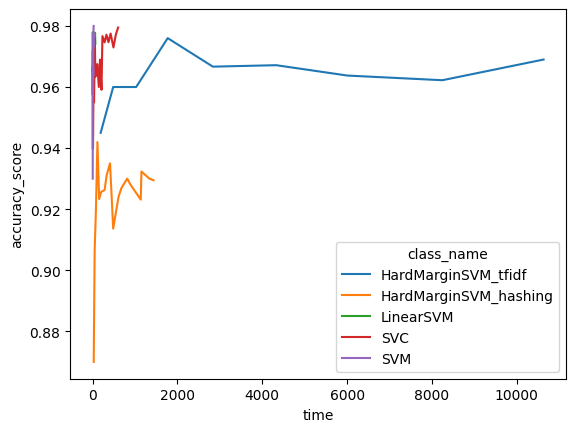

In [ ]:
sns.lineplot( x = "time", y = "accuracy_score",hue = 'class_name',data = df);

bỏ hardmarginSvm tfidf

<Axes: xlabel='time', ylabel='accuracy_score'>

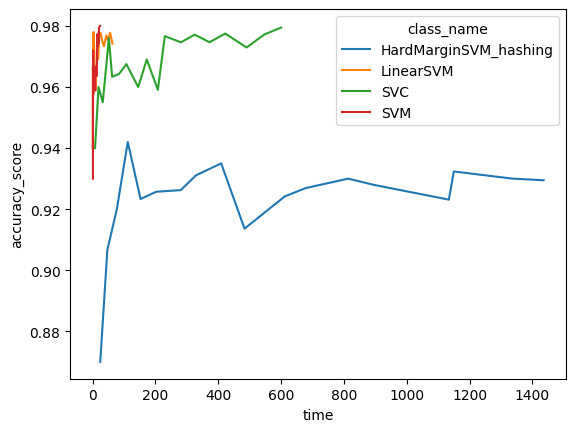

In [ ]:
sns.lineplot(x="time", y="accuracy_score", hue='class_name', data=df[df['class_name'] != 'HardMarginSVM_tfidf'])

bỏ hardmarginsvm cả 2 loại

<Axes: xlabel='time', ylabel='accuracy_score'>

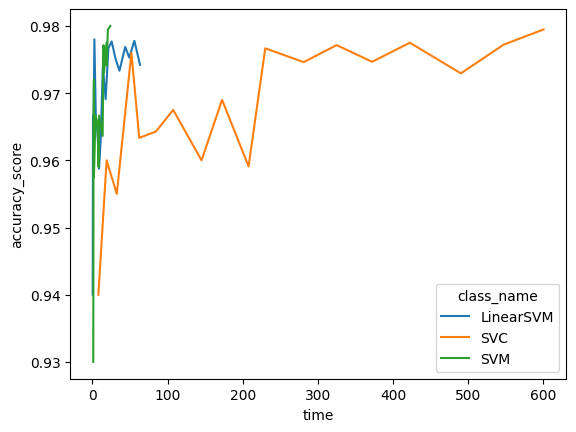

In [ ]:
sns.lineplot(x="time", y="accuracy_score", hue='class_name', data=df[~df['class_name'].isin(['HardMarginSVM_tfidf', 'HardMarginSVM_hashing'])])